In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree

dp = pd.read_csv('processed.cleveland.data', header=None, sep=",", na_values='?')
dp = dp.dropna()
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
feature_names = column_names[:-1]
dp.columns = column_names

print("Dataset length: ", len(dp))
print("Dataset shape: ", dp.shape)

print(dp.head())

X = pd.get_dummies(dp[feature_names])
Y = dp.values[:,-1]

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.2, random_state=5)


Dataset length:  297
Dataset shape:  (297, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


In [2]:
#----Question 1-----
ds_gini = DecisionTreeClassifier(criterion="gini")

ds_train = ds_gini.fit(X_train_1, Y_train_1)
ds_test = ds_gini.predict(X_test_1)
ds_1_score = ds_gini.score(X_test_1, Y_test_1)
print("Score:", ds_1_score)


Score: 0.5666666666666667


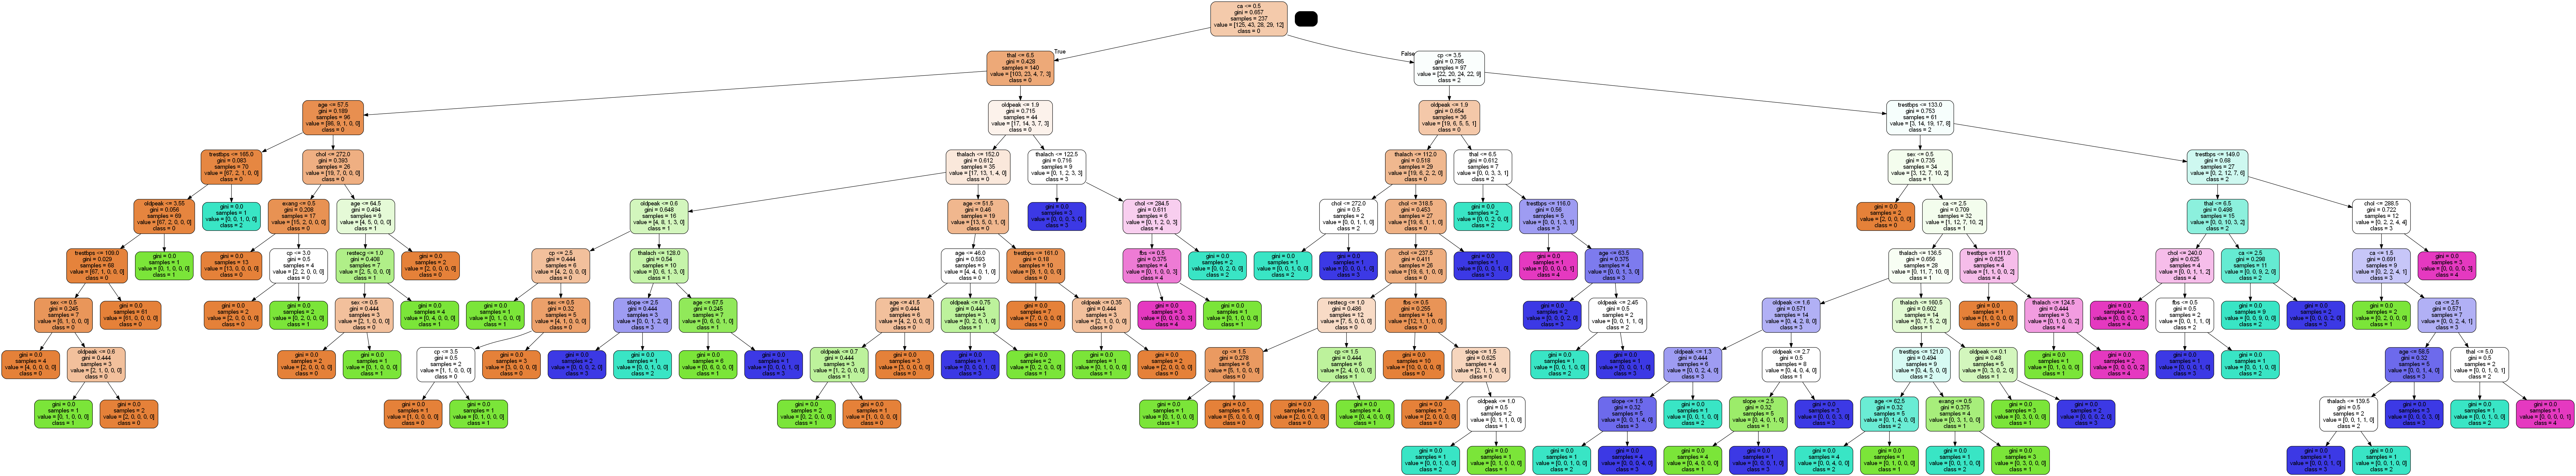

In [3]:
#----Question 2----
dot_data = export_graphviz(ds_train, out_file=None, feature_names=list(X.columns.values), class_names=['0', '1', '2', '3', '4'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

print(graph)
Image(graph.create_png())

In [4]:
#----Question 3----
ds_gini = DecisionTreeClassifier(criterion="gini", max_depth=3)

ds_train = ds_gini.fit(X_train_1, Y_train_1)
ds_test = ds_gini.predict(X_test_1)
ds_2_score = ds_gini.score(X_test_1, Y_test_1)
print("Score:", ds_2_score)


Score: 0.6


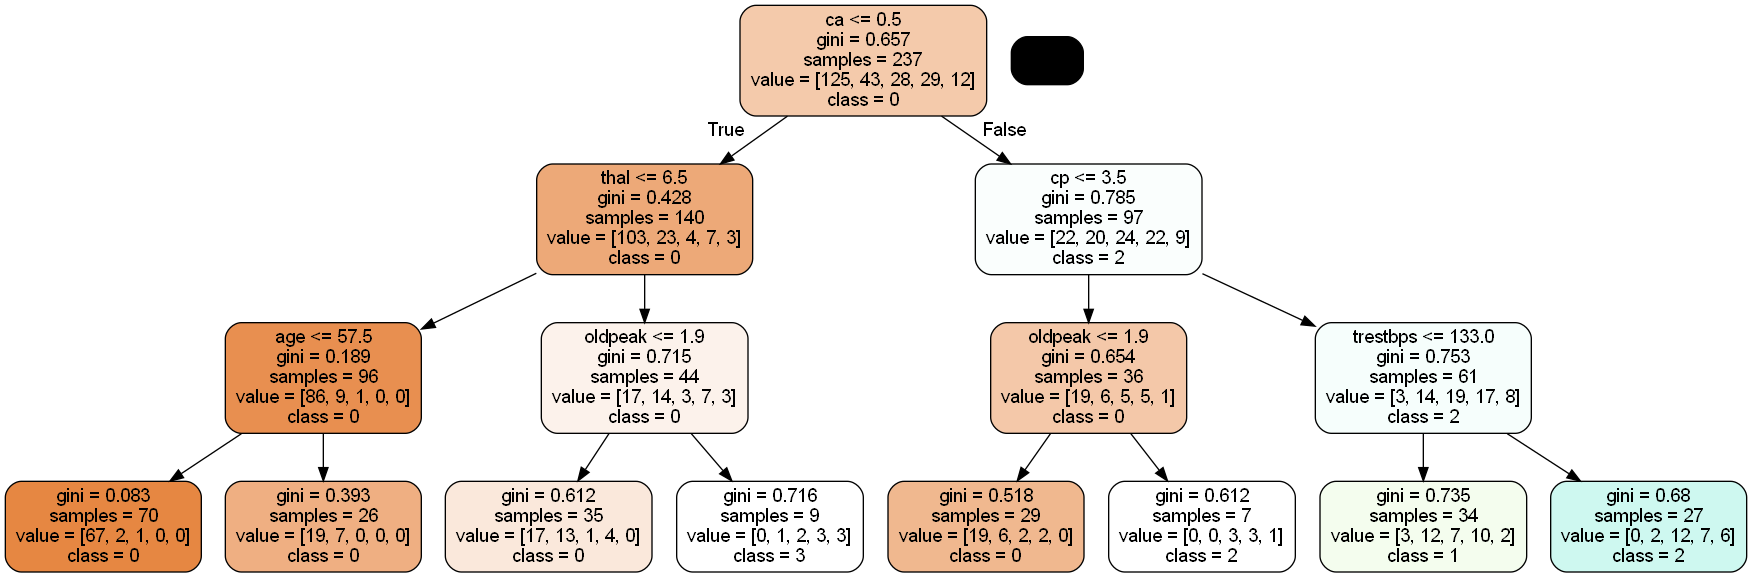

In [5]:
#----Question 4----
dot_data = export_graphviz(ds_train, out_file=None, feature_names=list(X_train_1.columns.values), class_names=['0', '1', '2', '3', '4'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

print(graph)
Image(graph.create_png())


In [6]:
#----Question 5----
ds_gini = DecisionTreeClassifier(criterion="entropy", max_depth=3)

ds_train = ds_gini.fit(X_train_1, Y_train_1)
ds_test = ds_gini.predict(X_test_1)
ds_3_score = ds_gini.score(X_test_1, Y_test_1)
print("Score:", ds_3_score)


Score: 0.6


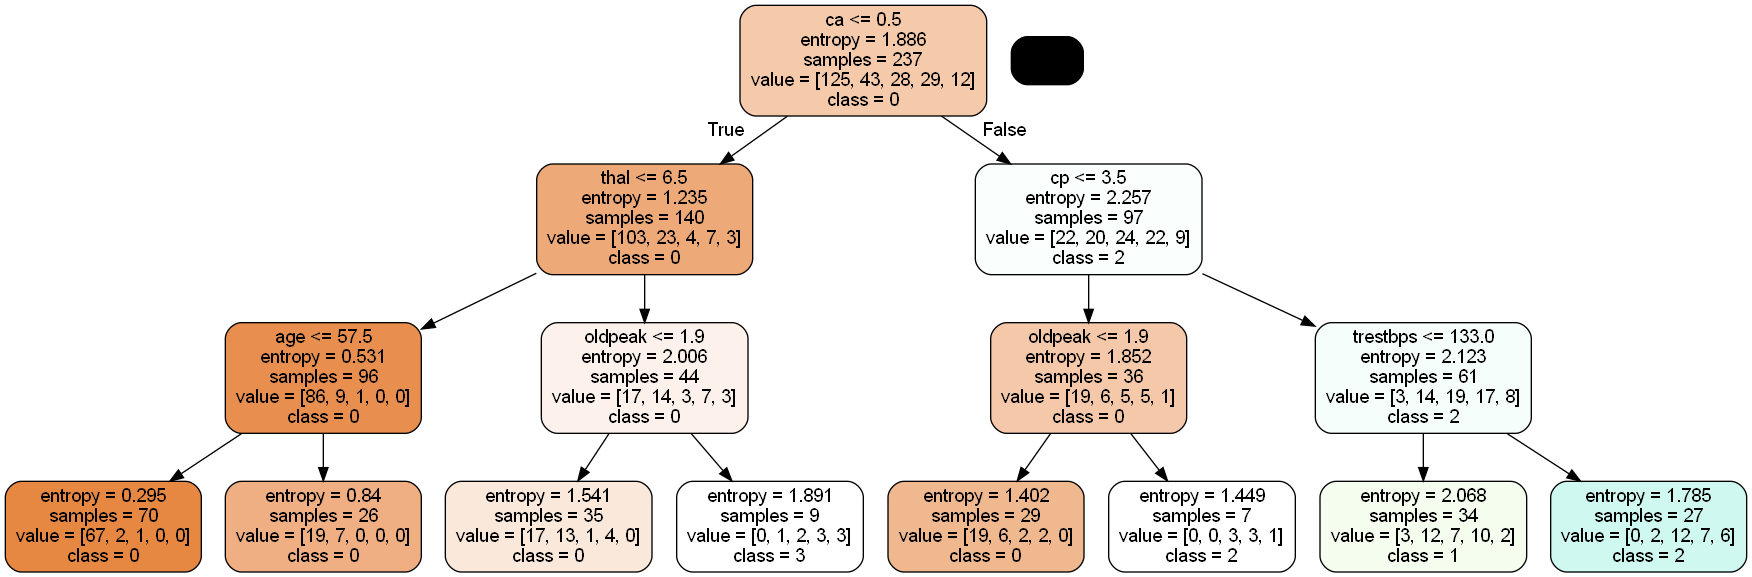

In [7]:
#----Question 6----
dot_data = export_graphviz(ds_train, out_file=None, feature_names=list(X_train_1.columns.values), class_names=['0', '1', '2', '3', '4'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

print(graph)
Image(graph.create_png())

In [8]:
#----Question 7----
print("Decision tree 1 had score: ", ds_1_score)
print("Decision tree 2 had score: ", ds_2_score)
print("Decision tree 3 had score: ", ds_3_score)
print("Decision tree 2, and 3 had an equal average accuracy score with decision tree 1 being slightly less accurate")

Decision tree 1 had score:  0.5666666666666667
Decision tree 2 had score:  0.6
Decision tree 3 had score:  0.6
Decision tree 2, and 3 had an equal average accuracy score with decision tree 1 being slightly less accurate
